# Sistemas simplificados

Las ecuaciones de Navier-Stokes, derivadas anteriormente, constituyen un complejo sistema de ecuaciones diferenciales parciales no lineales acopladas. Esta complejidad hace que su resolución no sea una tarea sencilla. Por esta razón, en el campo de la Dinámica de Fluidos Computacional (CFD, por sus siglas en inglés), frecuentemente se opta por abordar primero sistemas de ecuaciones simplificados. Este enfoque implica descartar o desacoplar algunos de los mecanismos físicos involucrados en las ecuaciones de Navier-Stokes originales.
Esta estrategia nos permite experimentar con diferentes ideas de manera rápida y relativamente sencilla. Una vez que comprendemos cómo resolver distintas partes de estas ecuaciones simplificadas, podemos combinar estos conocimientos para abordar las ecuaciones de Navier-Stokes completas en etapas posteriores.

$$u(x,0) = e^{-40\left(x-\frac{1}{2}\right)^2}$$

## Advección lineal

La ecuación de convección lineal 1-D es el modelo más simple y básico que se puede usar para aprender sobre CFD. Es sorprendente cuánto nos puede enseñar esta pequeña ecuación. Aquí está:
$$\frac{\partial u}{\partial t} + \alpha \frac{\partial u}{\partial x} = 0$$
Con condiciones iniciales dadas (entendidas como una "onda"), la ecuación representa la propagación de esa onda inicial con velocidad $c$, sin cambio de forma. Si la condición inicial es $u(x,0)=u_0(x)$, entonces la solución exacta de la ecuación es $u(x,t)=u_0(x-ct)$.
Para resolver numéricamente esta ecuación, la discretizamos en espacio y tiempo:

Usamos el esquema de Diferencia Hacia Adelante para la derivada temporal.
Usamos el esquema de Diferencia Hacia Atrás para la derivada espacial.

Consideramos discretizar la coordenada espacial $x$ en puntos que indexamos desde $i=0$ hasta $N$, y avanzamos en intervalos de tiempo discretos de tamaño $\Delta t$.
De la definición de derivada (simplemente eliminando el límite), sabemos que:
$$\frac{\partial u}{\partial x}\approx \frac{u(x+\Delta x)-u(x)}{\Delta x}$$
Nuestra ecuación discreta, entonces, es:
$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + \alpha \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0$$
Donde $n$ y $n+1$ son dos pasos consecutivos en el tiempo, mientras que $i-1$ e $i$ son dos puntos vecinos de la coordenada $x$ discretizada. Si hay condiciones iniciales dadas, entonces la única incógnita en esta discretización es $u_i^{n+1}$. Podemos resolver nuestra incógnita para obtener una ecuación que nos permita avanzar en el tiempo:
$$u_i^{n+1} = u_i^n - \alpha \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)$$
Esta última ecuación es crucial, ya que nos permite calcular el valor de $u$ en el siguiente paso de tiempo ($n+1$) para cada punto espacial $i$, basándonos en los valores conocidos en el paso de tiempo actual $n$.


In [1]:
#Modulos requeridos
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def advection_linear(a, L, n, dt, tf):
    '''
    Esta función calcula la advección lineal
    input: alpha o a (velocidad)
    L :longitud de grilla
    n: discretizaciojn de grilla
    dt: paso tiempo
    tf: tiempo final
    '''
    # Construimos la grilla
    dx = L/n # discretización de grilla
    x = np.linspace(0, L - dx, n)# 

    # Solución inicial
    u = np.exp(-40*(x-1/2)**2)
    ut_mas_dt = np.zeros(u.shape)

    # Avance de la solución de tiempo
    t = 0
    while(t < tf):
        for i in range(n):
            # condicion de borde para función periodica
            if i == 0:
                ut_mas_dt[i] = u[i] - a*dt/dx*(u[i] - u[n - 1]) #ingresa una condición incial
            else:
                ut_mas_dt[i] = u[i] - a*dt/dx*(u[i] - u[i - 1])
        
        
        u[:] = ut_mas_dt[:]
        t += dt
        
    plt.plot(x, u, 'o-', markersize=2, label=f'$t={tf}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()
   

Corremos ``advection_linear`` 
   - ``a``: Velocidad de advección, igual a ``1``,
   - ``L``: longitud de dominio igual a ``1``,
   - ``n``: Número de puntos en la grilla ``50``,
   - ``dt``: Paso de tiempo ``0.005``,
   - ``tf``: Tiempo final ``1``.

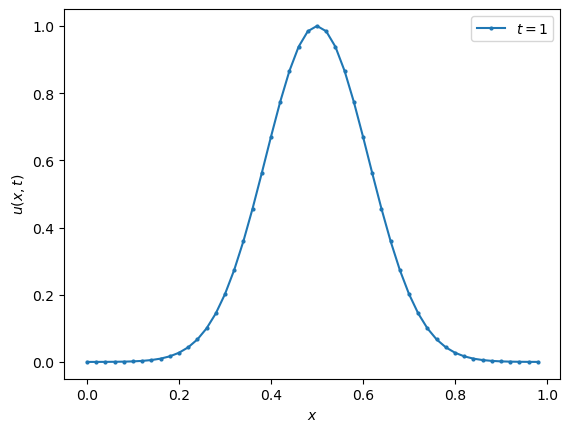

In [3]:
plt.figure(0)

# asignamos variables
a = 1 #m/s
L = 1 # m
n =  50
dt = 0.02 #seltatimepo en s
tf = 1 #s

advection_linear(a, L, n, dt, tf)

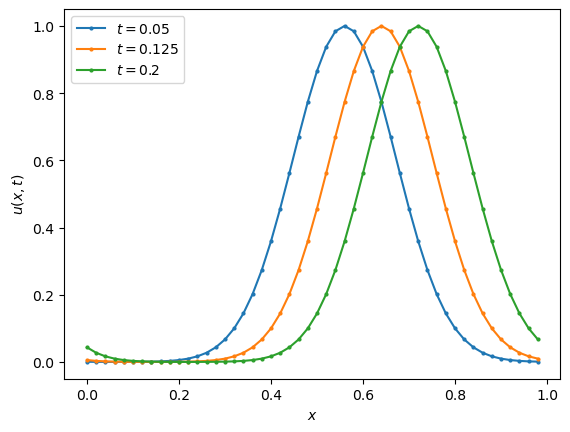

In [4]:
rango =  np.linspace(0.05, 0.2, 3, endpoint=True)

for tf in rango:
    advection_linear(a, L, n, dt, tf)

¿Qué comportamiento observas?

## Ecuación Burgers

In [5]:
def burgers(L, n, dt, tf):
    # Build grid
    dx = L/n
    x = np.linspace(0, L - dx, n)
    
    # Initialize solution
    u = np.exp(-40*(x-1/2)**2)
    ut = np.zeros(u.shape)

    # Advance solution in time
    t = 0
    while(t < tf):
        for i in range(n):
            # Enforce periodic boundary condition at x=0
            if i == 0:
                ut[i] = u[i] - 0.5*dt/dx * (u[i]**2-u[n-1]**2)
            else:
                ut[i] = u[i] - 0.5*dt/dx * (u[i]**2-u[i-1]**2)

        u[:] = ut[:]
        t += dt
        
    plt.plot(x, u, 'o-', markersize=2, label=f'$t={tf}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()

corremos ``burgers`` 
   - ``L``: longitud de dominio iagual a ``1``,
   - ``n``: Número de puntos en grilla igual a ``50``,
   - ``dt``: Paso de tiempo igual a ``0.005``,
   - ``tf``: Tiempo final ``0.5``.

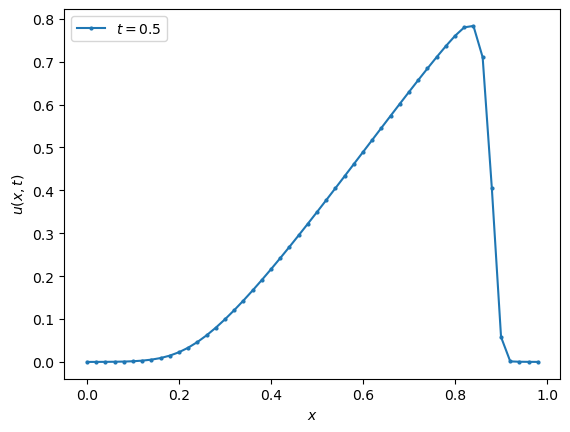

In [6]:
plt.figure(0)

# asignamos datos
L = 1
n = 50
dt = 0.005
tf = 0.5

burgers(L, n, dt, tf)

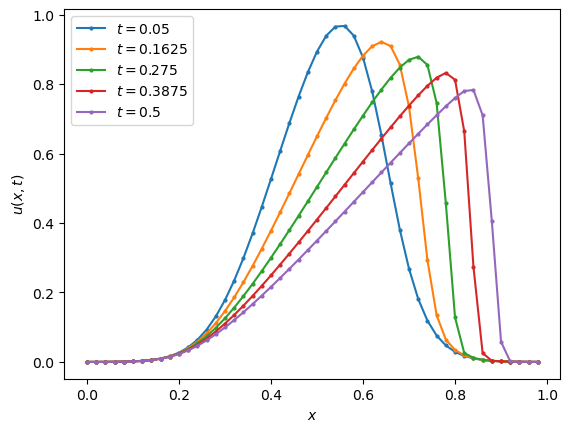

In [7]:
rango =  np.linspace(0.05, 0.5, 5, endpoint=True)

for tf in rango:
    burgers(L, n, dt, tf)

¿Qué comportamiento observas?

## Difusion lineal

In [28]:
def diffusion_linear(b, L, n, dt, tf):
    # construimos grilla
    dx = L/n
    x = np.linspace(0, L - dx, n)
    
    # Solución inicial
    u = np.exp(-40*(x - 1/2)**2)
    ut = np.zeros(u.shape)

    # avance solución de tiempo
    t = 0
    c = b*dt/dx**2
    while(t < tf):
        for i in range(n):
            if i == 0:
                # condición de frontera periodica x=0
                ut[i] = u[i] + c*(u[n - 1] - 2*u[i] + u[i + 1])
            elif i == n - 1:
                # condición de frontera periodica x=L
                ut[i] = u[i] + c*(u[i - 1] - 2*u[i] + u[0])
            else:
                ut[i] = u[i] + c*(u[i - 1] - 2*u[i] + u[i + 1])
        u[:] = ut[:]
        t += dt
    
    plt.plot(x, u, 'o-', markersize=2, label=f'$t={tf}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()

Ahora corramos``difussion_linear`` 
   - ``b``: Coeficiente de difusión igual a ``1e-2``,
   - ``L``: Longitud de dominio igual a ``1``,
   - ``n``: Numero de puntos de grilla igual a ``50``,
   - ``dt``: Paso de tiempo igual a ``0.001``,
   - ``tf``: Paso final de tiempo ``5``.

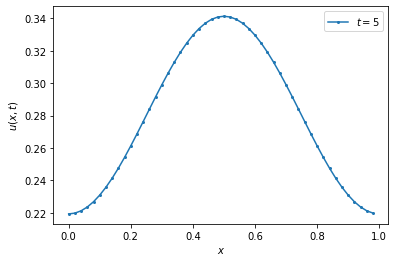

In [29]:
plt.figure(0)

# asignamos las variables
b = 1e-2
L = 1
n = 50
dt = 0.001
tf = 5

diffusion_linear(b, L, n, dt, tf)

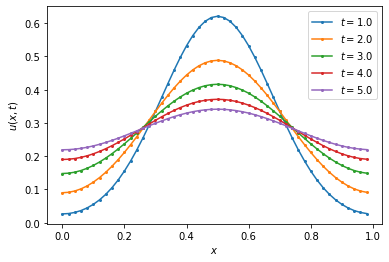

In [30]:
rango =  np.linspace(1, 5, 5, endpoint=True)

for tf in rango:
    diffusion_linear(b, L, n, dt, tf)

¿Qué comportamiento observas?